## BUSINESS UNDERSTANDING
Airbus,wants to know Airplane crashes and fatalities occurences and causes in order to put in place prevention measures.As a data scientist I have been tasked to come up with various insights on the crashes hence helping Airbus to  put in place correct measures

## DATA UNDERSTANDING
The data was obtained from kaggle and it contains the following columns
- index,Date,Time,Location,Operator,Flight ,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date: Date of accident
Time: Local time, in 24 hr. in the format hh:mm

Location: Location of the accident

Operator: Airline or operator of the aircraft

Flight: Flight number assigned by the aircraft operator

Route: Complete or partial route flown prior to the accident

Type: Aircraft type

Registration: ICAO registration of the aircraft
cn/In: Construction or serial number / Line or fuselage number
Aboard: Total people aboard
Fatalities: Total people died

Ground: Total killed on the ground

Summary: Brief description of the accident and cause if known


In [1265]:
#importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')


In [1266]:
##loading our dataframe
df=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


The dataframe contains 14 columns, and  5267 entries

## DATA PREPARATION

In [1267]:
##previewing our dataframe
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [1268]:
df.tail()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [1269]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,5268.0,2633.500000,1520.884940,0.0,1316.75,2633.5,3950.25,5267.0
Aboard,5246.0,27.554518,43.076711,0.0,5.00,13.0,30.00,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.00,9.0,23.00,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.00,0.0,0.00,2750.0


In [1270]:
df.dtypes

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [1271]:
#checking for missing values
df.isna().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [1272]:
df.isna().sum()/len(df)*100

index            0.000000
Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

Flight# has the highest percentage of missing valuees,so we will drop it together with the index column

In [1273]:
#dropping columns
df.drop(['index','Flight #'],axis=1,inplace=True)

In [1274]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [1275]:
#replacing missing values in objects with zero
df.fillna({'Time':0,'Location':'Unknown','Operator':'Unknown','Route':'Unknown',
            'Type':'Unknown','Registration':'Unknown','cn/In':0,'Summary':'Unknown'},
            inplace=True)

In [1276]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unknown,0,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,0,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,Unknown,0,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),Unknown,0,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),Unknown,0,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [1277]:
#filling missing values of numerical columns with their median
df['Aboard'].fillna(df['Aboard'].median(),inplace=True )
df['Fatalities'].fillna(df['Fatalities'].median(),inplace=True)
df['Ground'].fillna(df['Ground'].median(),inplace=True)


In [1278]:
#checking if there is still any missing values
df.isna().sum()

Date            0
Time            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [1279]:
#checking for duplicates
df.duplicated().sum()

0

## FEATURE ENGINEERING


In [1280]:
#dropping columns that I won't be using
df.drop(['Route','cn/In'],axis=1,inplace=True)

In [1281]:
#converting floats into objects
df['Aboard']=df['Aboard'].astype(int)
df['Fatalities']=df['Fatalities'].astype(int)
df['Ground']=df['Ground'].astype(int)

In [1282]:
#creating a new column called survivors
df['Survivors']=df['Aboard']-df['Fatalities']

In [1283]:
#creating a new column of those who died on the air
df['Air']=df['Fatalities']-df['Ground']

In [1284]:
#getting the survivall rate
df['survival_rate']=df['Survivors']/df['Aboard']*100
df['Fatality_rate']=df['Fatalities']/df['Aboard']*100

In [1285]:
##getting to know if the plane was a military plane or not
df["Is Military"] = df['Operator'].str.contains("Military",regex=False)

In [1286]:
#getting the year,month and day the crashes
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['month']=df['Date'].dt.month
df['monthname'] = df['Date'].dt.month_name(locale = 'English')
df['Day_Week'] = pd.DatetimeIndex(df['Date']).day_name()
df['date1']=df['month'].astype('str')+'/'+df['year'].astype('str')

In [1287]:
# getting the season in which the crash occured
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
        
df['season']=df['month'].apply(get_season)

In [1288]:
def get_weekend(Day_Week):
    if Day_Week != 'Sunday' and Day_Week !='Saturday':
        return 'weekday'
    else:
        return 'weekend'
df['day1']=df['Day_Week'].apply(get_weekend)

In [1289]:
df

,Date,Time,Location,Operator,Type,Registration,Aboard,Fatalities,Ground,Summary,...,Fatality_rate,Is Military,year,day,month,monthname,Day_Week,date1,season,day1
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,Unknown,2,1,0,"During a demonstration flight, a U.S. Army fly...",...,50.0,True,1908,17,9,September,Thursday,9/1908,autumn,weekday
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...,...,100.0,True,1912,12,7,July,Friday,7/1912,summer,weekday
2,1913-08-06,0,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,Unknown,1,1,0,The first fatal airplane accident in Canada oc...,...,100.0,False,1913,6,8,August,Wednesday,8/1913,summer,weekday
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),Unknown,20,14,0,The airship flew into a thunderstorm and encou...,...,70.0,True,1913,9,9,September,Tuesday,9/1913,autumn,weekday
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),Unknown,30,30,0,Hydrogen gas which was being vented was sucked...,...,100.0,True,1913,17,10,October,Friday,10/1913,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,A-1325,112,98,2,"While on approach, the military transport cras...",...,87.5,True,2009,20,5,May,Wednesday,5/2009,spring,weekday
5264,2009-05-26,0,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,9Q-CSA,4,4,0,The cargo plane crashed while on approach to I...,...,100.0,False,2009,26,5,May,Tuesday,5/2009,spring,weekday
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,F-GZCP,228,228,0,The Airbus went missing over the AtlantiOcean ...,...,100.0,False,2009,1,6,June,Monday,6/2009,summer,weekday
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,C-FJJR,1,1,0,The air ambulance crashed into hills while att...,...,100.0,False,2009,7,6,June,Sunday,6/2009,summer,weekend


In [1290]:
 #new data frame with split value columns and getting the country
df['Country']  = df['Location'].str.split(',').str[-1].str.strip().str.upper()



In [1291]:
df.head()

,Date,Time,Location,Operator,Type,Registration,Aboard,Fatalities,Ground,Summary,...,Is Military,year,day,month,monthname,Day_Week,date1,season,day1,Country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,Unknown,2,1,0,"During a demonstration flight, a U.S. Army fly...",...,True,1908,17,9,September,Thursday,9/1908,autumn,weekday,VIRGINIA
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,Unknown,5,5,0,First U.S. dirigible Akron exploded just offsh...,...,True,1912,12,7,July,Friday,7/1912,summer,weekday,NEW JERSEY
2,1913-08-06,0,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,Unknown,1,1,0,The first fatal airplane accident in Canada oc...,...,False,1913,6,8,August,Wednesday,8/1913,summer,weekday,CANADA
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),Unknown,20,14,0,The airship flew into a thunderstorm and encou...,...,True,1913,9,9,September,Tuesday,9/1913,autumn,weekday,OVER THE NORTH SEA
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),Unknown,30,30,0,Hydrogen gas which was being vented was sucked...,...,True,1913,17,10,October,Friday,10/1913,autumn,weekday,GERMANY


In [1292]:
df['decade']= (df['year']) // 10 * 10
decade.value_counts()

1970    837
1990    775
1960    721
1980    717
1950    596
2000    583
1940    510
1930    323
1920    178
1910     27
1900      1
Name: year, dtype: int64

#   EXPLATORY DATA ANALYSIS

### Which decade had the most airplane crashes ?



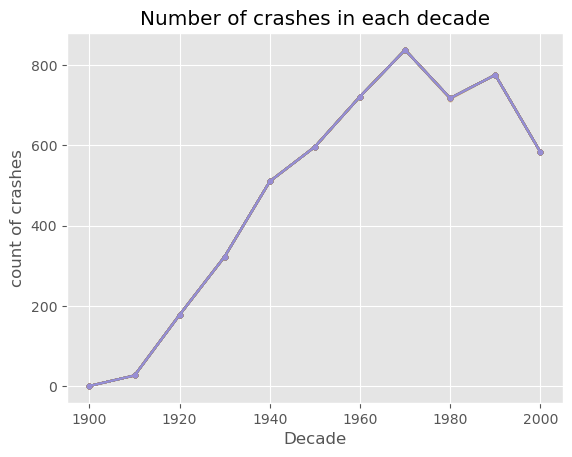

In [1293]:

decade_count=df.groupby(df['decade']).count()
plt.plot(decade_count.index,decade_count,marker='.')
plt.title('Number of crashes in each decade')
plt.xlabel('Decade')
plt.ylabel('count of crashes')
plt.show()


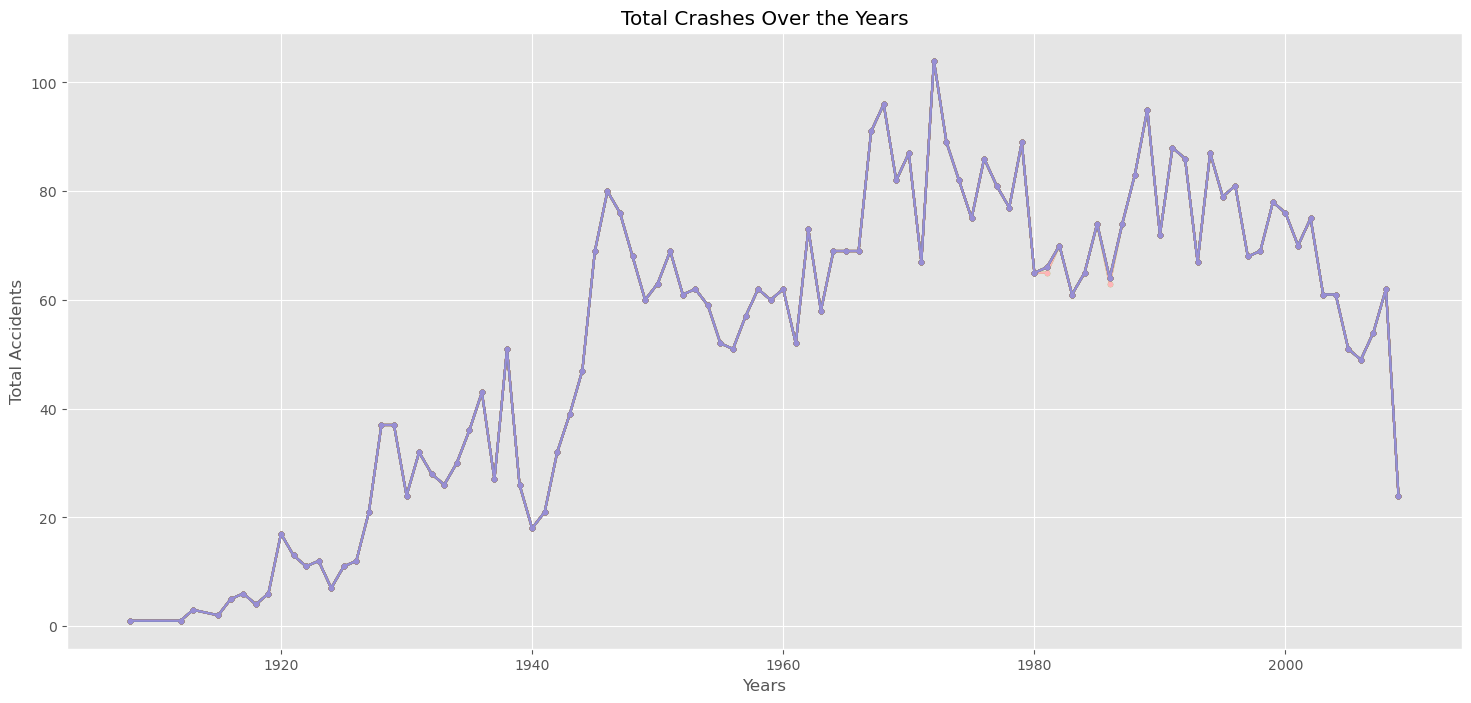

In [1294]:
year_count = df.groupby(df['year']).count()

plt.figure(figsize= (18, 8))
plt.plot(year_count.index, year_count, marker= '.')
plt.title('Total Crashes Over the Years')
plt.xlabel('Years')
plt.ylabel('Total Accidents')
plt.show()

Around 1970s alot of crashes occured,but since then the amount of crashes has reduced over time

### Which month had the highest number of crashes ?

Text(0, 0.5, 'Months')

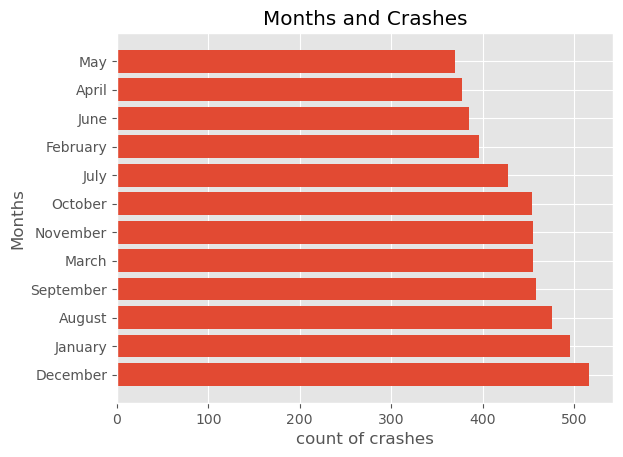

In [1295]:
month_count=df.monthname.value_counts()
x=month_count.index
y=month_count.values
plt.barh(x,y)
plt.title('Months and Crashes')
plt.xlabel('count of crashes')
plt.ylabel('Months')

December,January and August recorded a high number of crashes,but there is less difference among the crashes occured across other months

### How do crashes occurence vary across seaons ?

Text(0, 0.5, 'Count of crashes')

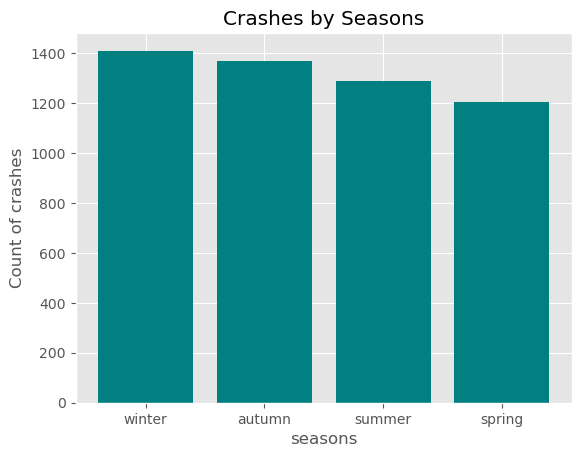

In [1296]:

season_count=df['season'].value_counts()
plt.bar(season_count.index,season_count,color='Teal')
plt.title('Crashes by Seasons')
plt.xlabel('seasons')
plt.ylabel('Count of crashes')

Winter had the highest amount of crashes, this can be due to the poor visibility and poor weather .

###  WHEN DID CRASHES OCCUR, IS IT WEEKDAYS OR WEEKENDS?

Text(0.5, 1.0, 'Weekday/Weekends')

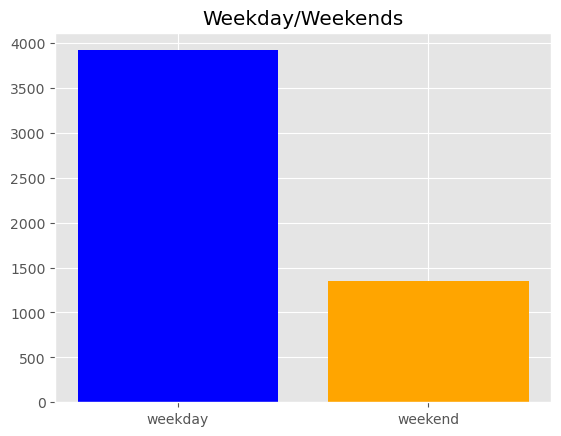

In [1297]:
dayweek_count=df['day1'].value_counts()
c='Blue','Orange'
plt.bar(dayweek_count.index,dayweek_count,color=c)
plt.title('Weekday/Weekends')

Most crashes occur during the weekdays

### Crashes across countries

Text(0, 0.5, 'Countries')

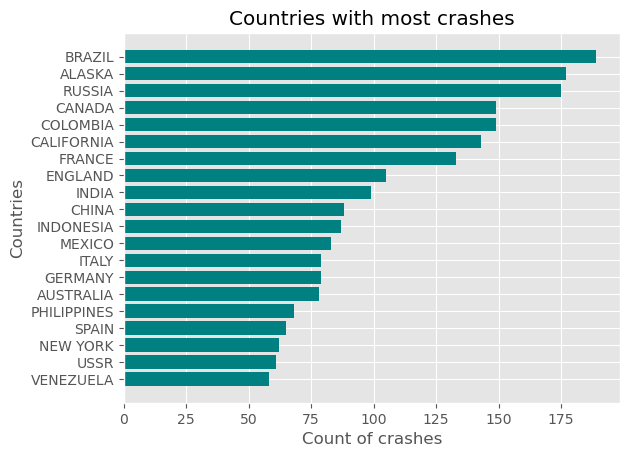

In [1298]:
countries_count=df['Country'].value_counts().head(20).sort_values()
plt.barh(countries_count.index,countries_count,color='Teal')
plt.title('Countries with most crashes')
plt.xlabel('Count of crashes')
plt.ylabel('Countries')

We can see that brazil has a high number of crashes,followed by Alaska and Canada


### Which type of aircraft had the highest amount of crashes?

Text(0.5, 1.0, 'Aircraft with the most crashes')

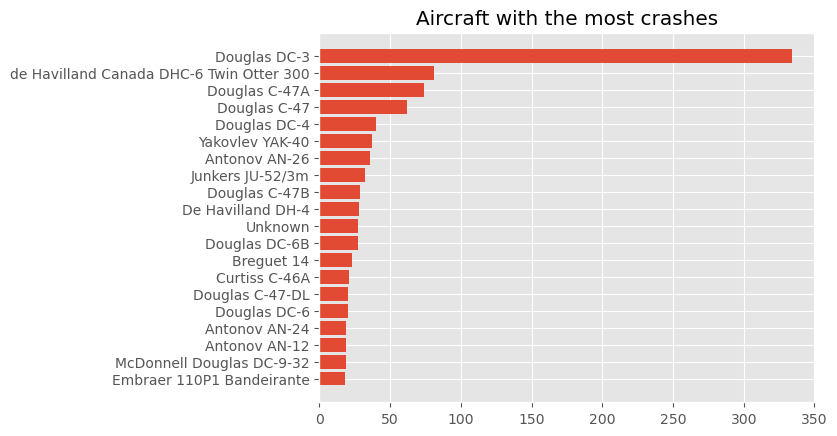

In [1299]:
type_count=df['Type'].value_counts().head(20).sort_values()
plt.barh(type_count.index,type_count)
plt.title('Aircraft with the most crashes')

Text(0.5, 1.0, 'airplane with the highest fatalities')

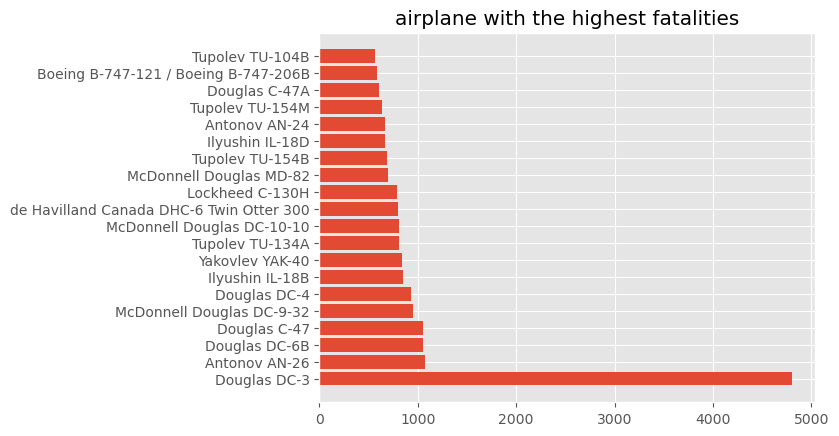

In [1300]:

fatalities_craft=df.groupby(['Type'])['Fatalities'].sum().sort_values(ascending=False).head(20)
plt.barh(fatalities_craft.index,fatalities_craft)
plt.title('airplane with the highest fatalities')

<BarContainer object of 20 artists>

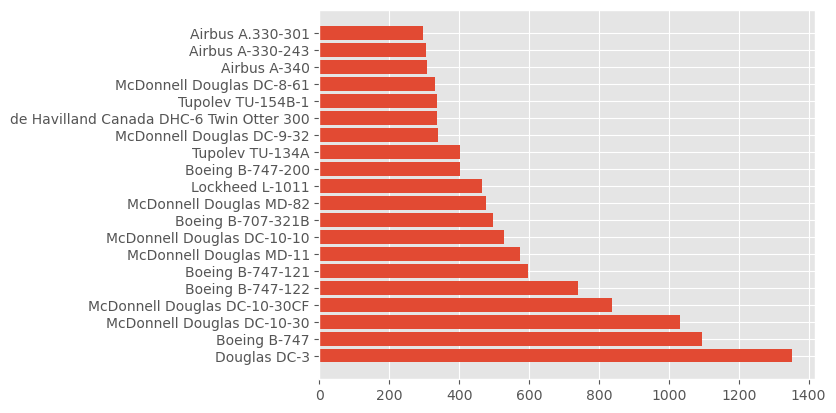

In [1301]:
Survivors_craft=df.groupby(['Type'])['Survivors'].sum().sort_values(ascending=False).head(20)
plt.barh(Survivors_craft.index,Survivors_craft)

## Which type of operator has the most crashes??

<BarContainer object of 20 artists>

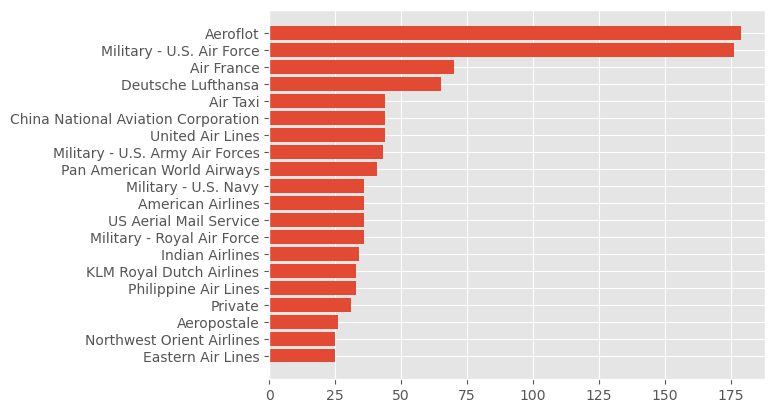

In [1302]:
operator_crash=df['Operator'].value_counts().head(20).sort_values()
plt.barh(operator_crash.index,operator_crash)

We can see that Aeroflot , and Military-U.S AirForce are the Operators that have had a high number of crashes

### BETWEEN MILITARY AND NON-MILITARY,WHICH OPERATOR WAS INVOLVED IN MOST CRASHES??

Text(0.5, 1.0, 'Military and Commercial')

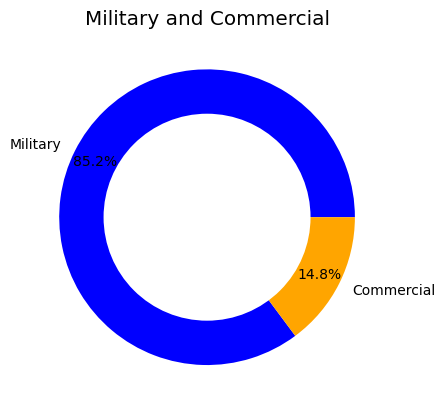

In [1303]:
military=df['Is Military'].value_counts()
c='blue','orange'
mylabels='Military','Commercial'
plt.pie(military,labels=mylabels,colors=c,autopct='%1.1f%%', pctdistance=0.85)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Military and Commercial')

Military planes were involved in most crashes compared to non military planes

## Between Military and Non Military which had the most fatalities ?

<AxesSubplot:title={'center':'Fatalities per crash'}, ylabel='Is Military'>

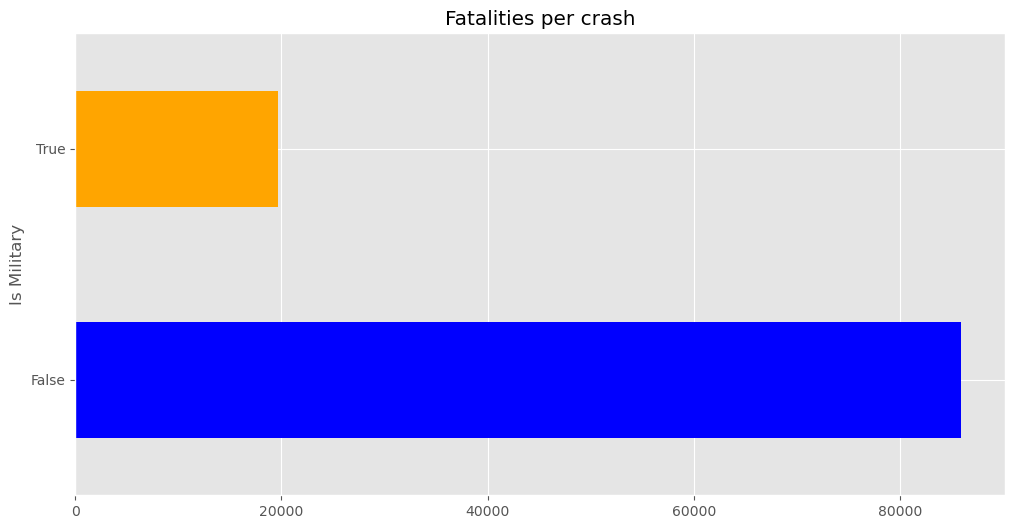

In [1304]:
c='blue','orange'
df.groupby(['Is Military'])['Fatalities'].sum().plot(kind='barh',figsize=[12, 6], title='Fatalities per crash',color=c)

Non military crashes have a high number of fatalities due to the high number of  passangers

Text(0.5, 1.0, 'Fatalities by Survivors')

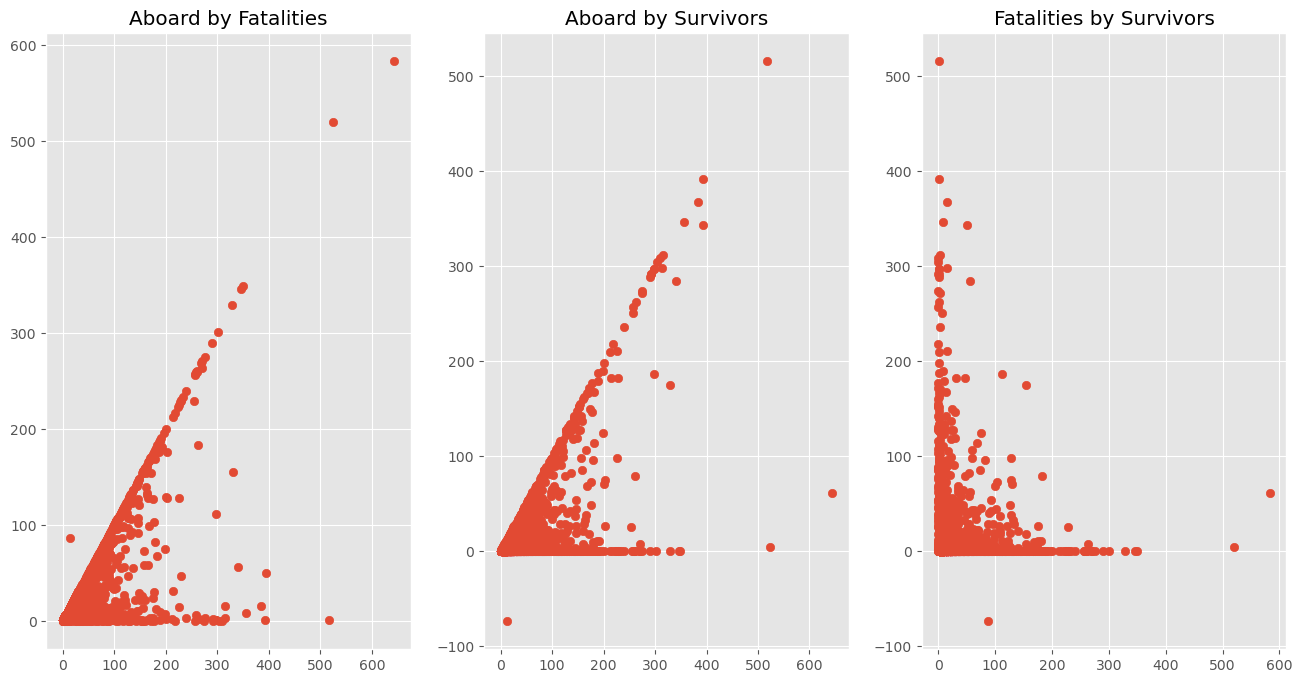

In [1305]:

fig,axes=plt.subplots(1,3,figsize=(16,8))

y=df['Aboard']
x1=df['Fatalities']
x2=df['Survivors']
axes[0].scatter(y,x1)
axes[0].set_title('Aboard by Fatalities')
axes[1].scatter(y,x2)
axes[1].set_title('Aboard by Survivors')
axes[2].scatter(x1,x2)
axes[2].set_title('Fatalities by Survivors')


#### Which type of aircraft had the highest number of fatalities

<BarContainer object of 20 artists>

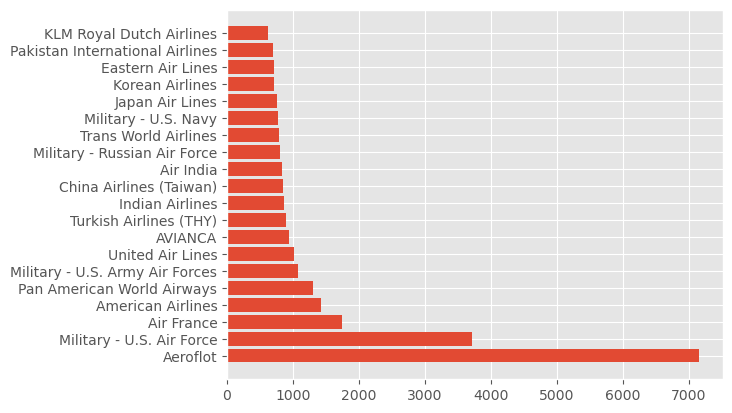

In [1306]:
Fatalities_craft=df.groupby(['Operator'])['Fatalities'].sum().sort_values(ascending=False).head(20)
plt.barh(Fatalities_craft.index,Fatalities_craft)

Aeroflot ,then Military -U.s Air Force,  have had the highest number of fatalities

## Which Operator had the worst crash of all time ??

In [1307]:
Worst_craft=df.groupby(['Operator'])['Fatalities'].max().sort_values(ascending=False).head(20)
Worst_craft


Operator
Pan American World Airways / KLM              583
Japan Air Lines                               520
Saudi Arabian Airlines / Kazastan Airlines    349
Turkish Airlines (THY)                        346
Air India                                     329
Saudi Arabian Airlines                        301
Iran Air                                      290
Military - IslamiRevolution's Guards Corps    275
American Airlines                             271
Korean Airlines                               269
China Airlines (Taiwan)                       264
Nationair (chartered by Nigeria Airways)      261
Pan American World Airways                    259
Air New Zealand                               257
Arrow Airways                                 256
Military - Russian Air Force                  240
Garuda Indonesia Airlines                     234
Trans World Airlines                          230
Swissair                                      229
Air France                               

## Fatality and Survival Rate over the years ?

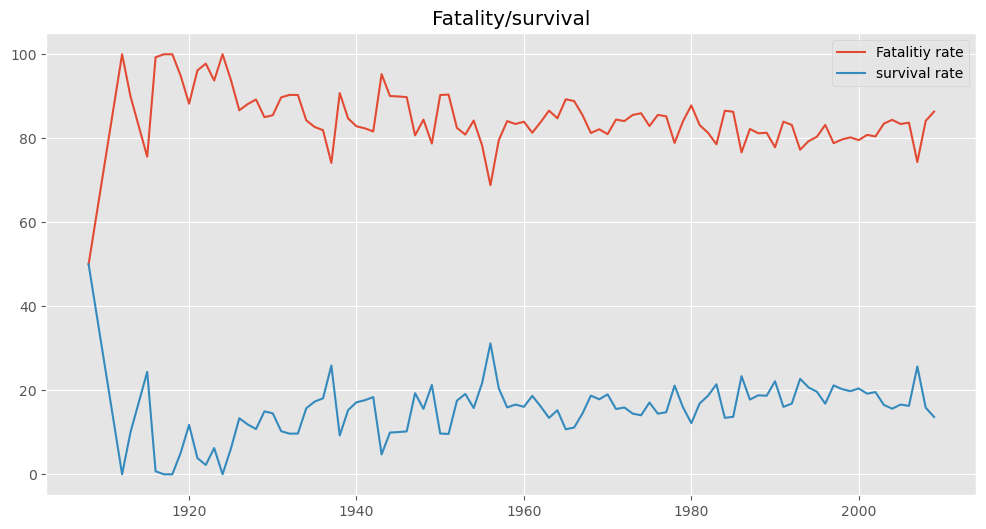

In [1308]:
fatalities_year = df[['Fatality_rate','year']].groupby(['year']).mean()
survival_year=df[['survival_rate','year']].groupby(['year']).mean()

plt.figure(figsize=(12,6))
plt.plot(fatalities_year, label='Fatalitiy rate')
plt.plot(survival_year,label='survival rate')
plt.title('Fatality/survival')
plt.legend()

In [1309]:
print(df['Fatality_rate'].mean())
print(df['survival_rate'].mean())

83.47885842073167
16.521141579268324


We can see that the average fatalityrate and survival rate over the years has remained almost the same ,with a few changes over time

## Did most people die on the air or on the ground over the years ?

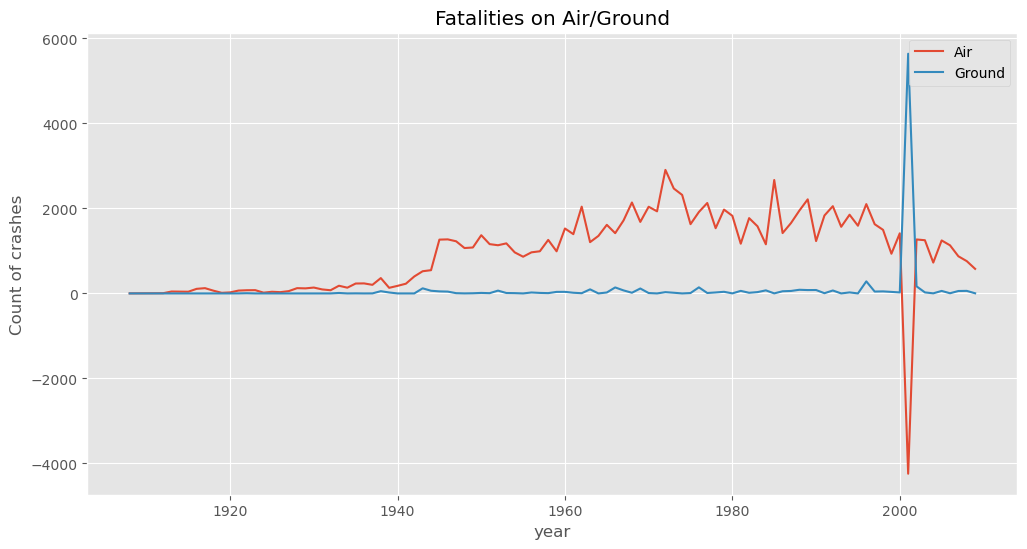

In [1310]:
air_year = df[['Air','year']].groupby(['year']).sum()
ground_year=df[['Ground','year']].groupby(['year']).sum()

plt.figure(figsize=(12,6))
plt.plot(air_year, label='Air')
plt.plot(ground_year,label='Ground')
plt.title('Fatalities on Air/Ground')
plt.xlabel('year')
plt.ylabel('Count of crashes')
plt.legend()


We can see that the most fatalities have occured on air untill in th 2000s where ,fatalities on the ground rose upto around 6000

### What is the chance of someone surviving over the years

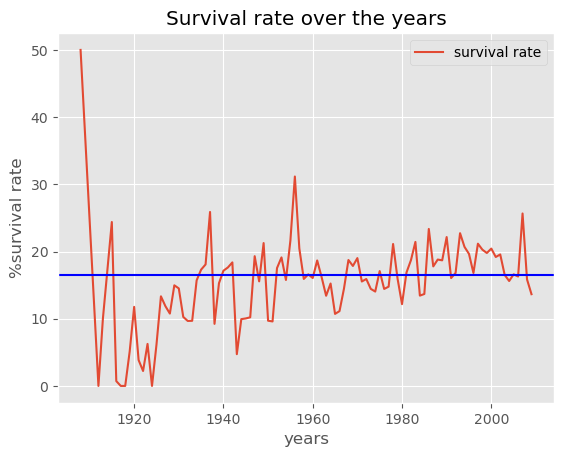

In [1311]:
survival_year=df[['survival_rate','year']].groupby(['year']).mean()
plt.plot(survival_year,label='survival rate')
plt.xlabel('years')
plt.axhline(y=df["survival_rate"].mean(), color='b', linestyle='-')
plt.ylabel('%survival rate')
plt.title('Survival rate over the years')
plt.legend()



In [1312]:
df['survival_rate'].mean()

16.521141579268324

We can see that the the chances of someone surviving incase of a plane crashes is about 16.58%

## CONCLUSIONS
- The 1970s decade had the highest amount of crashes , but since then the preceeding decades have had a reduction of crashes
- December,January and August recorded a high number of crashes,but there is less difference among the crashes occured across other months
- Winter had the highest amount of crashes, this can be due to the poor visibility and poor weather .
- Most crashes occur during the weekdays,this is due to maybe the busy flight schedules during weekdays
-  brazil has a high number of crashes,followed by Alaska and Canada
- Non military crashes have a high number of fatalities due to the high number of  passangers
- Pan african klm and japan airways had the  worst crashes with a alot of fatalities
- We can see that the most fatalities have occured on air untill in th 2000s where ,fatalities on the ground rose upto around 6000
- We can see that the the chances of someone surviving incase of a plane crashes is about 16.58%